### *Reading the libraries*

In [1]:
import numpy as np
import pandas as pd
import os
import os.path
from operator import add
from datetime import datetime, date, timedelta
from matplotlib import pyplot as plt

### *Seting up the display extent*

In [2]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',138)

## Step 1: Setting Up Climate Scenarios (CH2018, and Random Scenarios)

In [3]:
def is_leap(year):
    """ return true for leap years, False for non leap years """
    return year % 4 == 0 and ( year % 100 != 0 or year % 400 == 0)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

### S1.1. *Function that pruduces new climate (precipitation) realization*

In [4]:
def random_pcp(dfpcp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):
    
    #outFileName = OutFileName
    dfpcpCol = dfpcp.columns
    #sceNum = len(dfCol)

    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    from random import shuffle
    #a = []
    #for x in range(simLen): 
        #randomInd = [z for z in range(sceNum)]
        #shuffle(randomInd)
        #a.append(randomInd)
        
        
    a = []
    for i in range(simLen): 
        randomInd = [z for z in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
    
        
    RCP = RCPNames
    columnsDfpcp = ['sc_' + RCP + str(k) for k in range(1, sceNum+1,1)] 
    c = [[19810101 for p in range(sceNum)]]
    #df1 = 'df' + str(outDFNumber)
    df1pcp = pd.DataFrame(c, columns =columnsDfpcp)
    #df1.to_csv('SAeidVaghefimodified1111222.csv', index = False)

    c.clear()

    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1 # counter i; equal to simulation length (simLen)
            p += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1
                
        #print(m) # this line show the progress of the work by typing the years of simulation

        dfnewpcp = 'df' + str(m)
        dfnewpcp = pd.DataFrame(c, columns =columnsDfpcp)
        c.clear()
        df1pcp = df1pcp.append(dfnewpcp, ignore_index=True)
        
    return df1pcp

### S1.2. *Function that pruduces new climate (temperature) realization*

In [5]:
def random_tmp(dftmp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):

    #dfCol = df.columns
    #sceNum = len(dfCol) // 2
    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    dftmpColMax = dftmp.columns[[i for i in range(0, sceNum*2, 2)]]
    dftmpColMin = dftmp.columns[[i for i in range(1, sceNum*2, 2)]]

    ## yek list be toole 119 ke dakhelesh list haye 68 ta ee darim be soorate random
    from random import shuffle
    #a = []
    #for i in range(simLen): 
        #randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        #shuffle(randomInd)
        #a.append(randomInd)
        
    
    a = []
    for i in range(simLen): 
        randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
        
    #print('end!')

    cT = []
    RCP = RCPNames
    columnsDfOdd = ['sc_' + RCP + str(k)  for k in range(1, sceNum+1,1)] 
    columnsDfEven = [""] * sceNum

    columnsDftmp = []
    #colOdd = ['Scr_' + str(i) for i in range(1, sceNum+1, 1)]
    #colEven = ['' for i in range(1, sceNum+1,1)]

    for i in range (sceNum):
        columnsDftmp.append(columnsDfOdd[i])
        columnsDftmp.append(columnsDfEven[i])


    #### OR:
    #columnsDf = ["Sr", ""] * sceNum
    df1tmp = pd.DataFrame(cT, columns =columnsDftmp)
    #df1.to_csv("rrrrrrrrmodified1111222.csv", index = False)


    cMax = [[19810101 for p in range(sceNum)]]
    cMin = [["" for p in range(sceNum)]]
    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values) 
    
            i += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values)

            i += 1

        c = []
        for y in range(0, len(cMax), 1): # the length of simulation years
            for z in range(sceNum): # range(4)
                c.append(cMax[y][z])
                c.append(cMin[y][z])

        cMax.clear()
        cMin.clear()

        cMain = []
        cMain = list(chunks(c, sceNum * 2))
        #print(m) # this line show the progress of the work by typing the years of simulation

    ### Should be checked

        dfnewtmp = 'dftmp' + str(m)
        #columnsDf = ["Sr", ""]*sceNum
        #columnsDf = [['sc_' + str(k), ""] for k in range(1, sceNum+1,1)] 
        dfnewtmp = pd.DataFrame(cMain, columns =columnsDftmp)
        c.clear()
        df1tmp = df1tmp.append(dfnewtmp, ignore_index=True)
        
    return df1tmp

### S1.3. *Function that calls the random_pcp and random_tmp for all stations of a Ski resort*

In [6]:
def randomness_pcp_tmp(fnames, Xfactor1):
    for f in fnames:
        if 'p.csv' in f:
            print('Writing pcp files started!')
            #df = pd.read_csv('47-0625000_8-6666667p.csv')
            dfpcp = pd.read_csv(f)


            filt1 = dfpcp.columns.str.contains('RCP26|_26_') #12
            filt2 = dfpcp.columns.str.contains('RCP45|_45_') #25
            filt3 = dfpcp.columns.str.contains('RCP85|_85_') #31

            dfpcpRCP26 = dfpcp.loc[:, filt1]
            dfpcpRCP45 = dfpcp.loc[:, filt2]
            dfpcpRCP85 = dfpcp.loc[:, filt3]

            dfpcpRCP26_n = random_pcp(dfpcpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dfpcpRCP45_n = random_pcp(dfpcpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dfpcpRCP85_n = random_pcp(dfpcpRCP85, 1981, 2099, 31, '85_', Xfactor1)


            result = pd.concat([dfpcpRCP26_n, dfpcpRCP45_n, dfpcpRCP85_n], axis=1, sort=False)
            #result.to_csv('47-0625000_8-6666667p_n1.csv', index = False)


            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)
            root = os.getcwd()
            
            '''This part makes a new dir for outouts''' ## should be cooment out later
            #if os.path.isdir(os.path.join(root, 'Outputs_randomness')):
                #pass
            #else: os.mkdir(os.path.join(root, 'Outputs_randomness'))

            #outfolder = os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written

            filepath = os.path.join(outfolder, newName)

            result.to_csv(filepath, index = False)
            print('End of writing pcp files!')
            #print("--- %s seconds ---" % (time.time() - start_time))


        elif 't.csv' in f:
            print('Writing tmp files started!')
            dftmp = pd.read_csv(f)
            dftmpCol = list(dftmp.columns)

            filt1_max = [dftmpCol.index(s) for s in dftmpCol if ("_26_") in s or ("RCP26") in s]
            filt2_max = [dftmpCol.index(s) for s in dftmpCol if ("_45_") in s or ("RCP45") in s]
            filt3_max = [dftmpCol.index(s) for s in dftmpCol if ("_85_") in s or ("RCP85") in s]

            aOnefilt1= [1]*len(filt1_max)
            aOnefilt2= [1]*len(filt2_max)
            aOnefilt3= [1]*len(filt3_max)

            filt1_min = list(map(add, filt1_max, aOnefilt1)) # 
            filt2_min = list(map(add, filt2_max, aOnefilt2))
            filt3_min = list(map(add, filt3_max, aOnefilt3))

            filt1Tot = []
            for i in range(len(filt1_max)):
                filt1Tot.append(filt1_max[i])
                filt1Tot.append(filt1_min[i])

            filt2Tot = []
            for j in range(len(filt2_max)):
                filt2Tot.append(filt2_max[j])
                filt2Tot.append(filt2_min[j])

            filt3Tot = []
            for k in range(len(filt3_max)):
                filt3Tot.append(filt3_max[k])
                filt3Tot.append(filt3_min[k])

            dftmpRCP26 = dftmp[dftmp.columns[filt1Tot]]
            dftmpRCP45 = dftmp[dftmp.columns[filt2Tot]]
            dftmpRCP85 = dftmp[dftmp.columns[filt3Tot]]

            dftmpRCP26_n = random_tmp (dftmpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dftmpRCP45_n = random_tmp (dftmpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dftmpRCP85_n = random_tmp (dftmpRCP85, 1981, 2099, 31, '85_', Xfactor1)

            result = pd.concat([dftmpRCP26_n, dftmpRCP45_n, dftmpRCP85_n], axis=1, sort=False)

            #ewName = 'n'+f
            #ilepath = os.path.join(os.environ.get('HOME'), newName)
            #esult.to_csv(filepath, index = False)

            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)

            #outfolder =os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written
            
            filepath = os.path.join(outfolder, newName)
            result.to_csv(filepath, index = False)

            print('End of writing tmp files')

        else :
            pass

## Step 2: Function for initiating the main dictionary of climate stations

In [7]:
def create_dic(a):
    '''Function: creating a dictionary for each climate station'''
    
    a = {}
    keys = ['fM', 'iPot', 'rSnow', 'dSnow', 'cPrec', 'dP', 'elev', 'lat', 'long', 'fileName']
    a = {key: None for key in keys}
    return a

def initialize_input_dict (mainFolderSki):
    ''' This function returns a dictionary , and addresses of 4 folders'''
    
    
    '''Step 1''' 
    rootFolder = mainFolderSki
    inputFolder = os.path.join(rootFolder,'input')
    ablationFolder = os.path.join(inputFolder, 'Ablation')
    accumulationFolder = os.path.join(inputFolder, 'Accumulation')
    climate_ref_Folder = os.path.join(inputFolder, 'Climate_ref')
    
    
    '''Step 2: Reading all files names inside the Ablation, Accumulation, and Climate folders'''  
    ablationFiles = []
    for filename in os.walk(ablationFolder):
        ablationFiles = filename[2]
    
    accumulationFiles = list()
    for filename in os.walk(accumulationFolder):
        accumulationFiles = filename[2]

    climate_ref_Files = list()
    for filename in os.walk(climate_ref_Folder):
        climate_ref_Files = filename[2]
        
        
    '''Step 3: Reading files inside ablation folder '''
    os.chdir(ablationFolder)
    with open(ablationFiles[0], 'r') as file:
        FM1 = file.read()
    with open(ablationFiles[1], 'r') as file:
        Ipot1 = file.read()
    with open(ablationFiles[2], 'r') as file:
        Rsnow1 = file.read()
        
        
    '''Step 4: Reading the lines of files inside ablation folder'''
    FM1 = FM1.replace('\n', '\t')
    FM1 = FM1.split('\t')
    Ipot1 = Ipot1.replace('\n', '\t').split('\t')
    Rsnow1 = Rsnow1.replace('\n', '\t').split('\t')
        
        
    '''Step 5: Reading the lines of files inside accumulation folder''' 
    os.chdir(accumulationFolder)
    
    with open(accumulationFiles[0], 'r') as file:
        cPrec = file.read()
    with open(accumulationFiles[1], 'r') as file:
        dSnow1 = file.read()
    
    cPrec = cPrec.replace('\n', '\t')
    cPrec = cPrec.split('\t')
    dSnow1 = dSnow1.replace('\n', '\t').split('\t')
    
    
    '''Step 6: Reading the lines of files inside climate folder''' 
    os.chdir(climate_ref_Folder)
    
    with open('pcp.txt', 'r') as file:
        pcpData = file.read()
    with open('tmp.txt', 'r') as file:
        tmpData = file.read()
        
    pcpData = pcpData.split('\n')
    
    for i in range(len(pcpData)):
        pcpData[i] = pcpData[i].split(',')
        
        
    '''Step 7: Initialazing the input dictionary of climate stations which holds the information of accumulation
     and ablation, and etc of the stations''' 
    nameStn = []
    for file in climate_ref_Files:
        if 'p.csv' in file:
            #nameStn.append('n_' + file[-25: -5])
            nameStn.append(file[-25: -5])

    stnDicts = []
    for i in range(len(nameStn)):
        stnDicts.append(create_dic(nameStn[i]))
    
    
    '''Step 8: Assigning the file names to the dictionary'''
    for i in range (len(nameStn)):
        stnDicts[i]['fileName'] = nameStn[i]

    
    '''Step 9: Assigning the accumulation and ablation values'''
    for stnDict in stnDicts:
        for i, element in enumerate(FM1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['fM'] = FM1[i+1]
                
        for i, element in enumerate(Ipot1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['iPot'] = Ipot1[i+1]

        for i, element in enumerate(Rsnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:  
                stnDict['rSnow'] = Rsnow1[i+1]

        for i, element in enumerate(dSnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['dSnow'] = dSnow1[i+1]

        for i, element in enumerate(cPrec):
            stnDict['cPrec'] = cPrec[1]
            stnDict['dP'] = cPrec[3]
            
    '''Step 10: Assigning the elevation, Lat and long to the dictionaries'''
    for i in range(len(stnDicts)):
        for j in range(1, len(pcpData)):
            
            #if pcpData[j][1][2:-1] == stnDicts[i]['fileName'][2:]:
            if pcpData[j][1][:-1] == stnDicts[i]['fileName'][:]:
                stnDicts[i]['lat']= pcpData[j][2]
                stnDicts[i]['long']= pcpData[j][3]
                stnDicts[i]['elev']= pcpData[j][4]
                
    return stnDicts, inputFolder, ablationFolder, accumulationFolder, climate_ref_Folder

## Step 3: Main Snow Model

#### S3.1 *Initializiing the main dictionary for a case study*

In [8]:
caseStudyStns = {}
inputFolder = ''
ablationFolder = ''
accumulationFolder = ''
climateFolder = ''
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case2_Atzmaening'
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case6_davos_elevations'
root = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2'

## calling the function with multiple return values
caseStudyStns, inputFolder, ablationFolder, accumulationFolder, climateFolder = initialize_input_dict(root)

#### S3.2 *Check if we have initialized correctly*

In [9]:
climateFolder

'C:\\Users\\ashrafse\\SA_2\\snowModelUZH\\case3_hoch-ybrig_v3_2\\input\\Climate_ref'

In [10]:
caseStudyStns

[{'fM': '1.012',
  'iPot': '1000',
  'rSnow': '0.5',
  'dSnow': '0.5',
  'cPrec': '0',
  'dP': '0',
  'elev': '1755',
  'lat': '47.00',
  'long': '8.7708333',
  'fileName': '47-0000000_8-7708333'}]

In [11]:
caseStudyStns[0].get("fM")

'1.012'

#### defing the X variables which control modeling (hyper parameter)

In [12]:
X2 = caseStudyStns[0].get("fM") # change 0 to i for all stations
X3 = caseStudyStns[0].get("iPot")
X4 =  caseStudyStns[0].get("rSnow")

In [13]:
print(X2)
print(X3)
print(X4)

1.012
1000
0.5


#### S3.3 *Function that runs the main model*

In [14]:
## 1st column as index: makaing date from 01 01 1981 to 2099 12 31
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date ).days + 1)):
        yield start_date + timedelta(n)

In [15]:
### Just function
def policy_release1(x1SnowThershold):
    return x1SnowThershold


### OR Let's make this function in a more OOP way:
class Policy_Ski:
    def __init__(self, x1SnowThershold):
        self.x1SnowThershold = x1SnowThershold
        
    def policy_release2(self):
        return(self.x1SnowThershold)
    
    def policy_release3(self):
        ''' this function should make a matrix of evaluation fot the condition of 100 day ay minimum condition'''
        pass

In [16]:
class Economic_Model_Ski:
    def __init__(self, xCostDay, xRevenueDay):
        self.costDayFixed = xCostDay
        self.revenueDayFixed = xRevenueDay
        
    def economic_costDay(self):
        return(self.costDayFixed)
    
    def economic_revenueDay(self):
        return(self.revenueDayFixed)

In [17]:
def snow_Model (Xfactor1 = None,  X2 = None, X3 = None, X4 = None, 
                X5 = None, X6 = None, xCostDay = None, xRevenueDay = None, x1SnowThershold = None,
                xGoodDays = None):
    '''' This function controls the Ski resort model'''
    
    
    ''' VERY IMPORTANT --- Controling the randomness --- VERY IMPORTANT'''
    os.chdir(climateFolder)
    fnames = os.listdir()
    #randomness_pcp_tmp(fnames, Xfactor1)
    
    print('Snow_Model: Matching the station names values with CSV files!')   
    '''Matching the station names values in the dictionary of stations with CSV files in Climate folder of the case Study'''
    pcpCaseStudy = []
    tmpCaseStudy = []

    for i in range(len(caseStudyStns)):
        pcpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 'p.csv'))
        tmpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 't.csv'))
    

    print('Snow_Model: Building a database for each csv file (tmp and pcp)!')
    
    '''Step 6: building a database for each precipitation and temperature file in Climate folder and saving them in a list'''
    '''6.1 reading the csv files as databases'''
    dfpcp = [None for _ in range(len(pcpCaseStudy))]
    dftmp = [None for _ in range(len(tmpCaseStudy))]
    for i in range(len(pcpCaseStudy)):
        dfpcp[i] = pd.read_csv(pcpCaseStudy[i])
        dftmp[i] = pd.read_csv(tmpCaseStudy[i])
        
    '''6.2 making a header for output files'''
    dfpcpCol = dfpcp[0].columns
    dftmpCol = dftmp[0].columns
    
    '''6.3 defining the length of simulations and scenarios'''
    scenariosLength = len(dfpcpCol)
    simulationLength = len(dftmp[0][dftmpCol[0]]) - 1
        
    
    '''Reading the beginning and end of the simulation''' 
    start_date = date(1981, 1, 1)
    end_date = date(2099, 12, 31)
    dateList = []
    for single_date in daterange(start_date, end_date):
        dateList.append(single_date.strftime("%m/%d/%Y"))

    seasonList = []
    for n in range (1981, 2100, 1):
        seasonList.append(str(n))
    
    
    print('Snow_Model: Part 1 Running the model, daily output!')

    '''PART 1 : daily outputs'''
    '''Running the model for each climate station:'''
    
    for k in range(len(caseStudyStns)):
        
        '''making a header for output files'''
        dfpcpCol = dfpcp[k].columns
        dftmpCol = dftmp[k].columns


        '''defining the length of simulations and scenarios'''
        scenariosLength = len(dfpcpCol)
        simulationLength = len(dftmp[0][dftmpCol[0]]) - 1


        '''declaring the initial arrays'''
        accumulation = [0 for _ in range(simulationLength)]
        ablation =  [0 for _ in range(simulationLength)]
        snowDeposite = [0 for _ in range(simulationLength)]
        total = np.zeros([simulationLength, 3*scenariosLength])
        
        
        '''declaring the new variables for financial analyses and temrature Index for artificial snow making'''
        artSnowCheck = [0 for _ in range(simulationLength)]
        revenue = [0 for _ in range(simulationLength)]
        cost = [0 for _ in range(simulationLength)]
        profit = [0 for _ in range(simulationLength)]
        totalMoney = np.zeros([simulationLength, 4*scenariosLength])


        '''Running the model for each climate scenario:'''
        for j in range(len(dfpcpCol)):
            ## Reading the information and inputs of the first day of simulation
            todayPCP = dfpcp[k][dfpcpCol[j]].iloc[1] if (dfpcp[k][dfpcpCol[j]].iloc[1] != -99) else 0
            todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[1],2) if(dftmp[k][dftmpCol[2*j]].iloc[1] != -99) else 0
            todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[1],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[1] != -99) else 0
            todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

            
            '''Thershold 300 mm
            EMA_workbench_controler for the thershold of good snow condition'''
            #A = policy_release1(x1SnowThershold)
            
            
            policySkiResort = Policy_Ski(x1SnowThershold)
            A = policySkiResort.policy_release2()
            
            
            
            '''EMA_workbench_controler for the thershold daily fixed revenue and cost expenses'''
            economyDaySki = Economic_Model_Ski(xCostDay, xRevenueDay) 
            revenueDayFixed = economyDaySki.economic_revenueDay()  # self.revenueDayFixed
            costDayFixed = economyDaySki.economic_costDay()  # self.costDayFixed
            
                            
            '''Accumulation for the first day:'''
            if (todayTMPAVE) <= X5:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

            elif X5 -1 < (todayTMPAVE) <= X5 + 1:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5 + 1 -todayTMPAVE)/2)

            else: accumulation[0] = 0


            '''Ablation for the first day:'''
            if todayTMPAVE <= X5:
                 ablation[0] = 0
            else: 
                ablation[0] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)

            '''Main mass balance equation for the first day:'''
            snowDeposite[0] = 0 if (0 + accumulation[0] - ablation[0]) < 0 else (0 + accumulation[0] - ablation[0])

            
            '''storing three values in a list for the first day'''
            total[0,3*j+0] = round((accumulation[0] - ablation[0]), 2)
            total[0,3*j+1] = round(snowDeposite[0], 2)
            # total[0,3*j+2] = 1 if (total[0,3*j+1] > A) else 0
            total[0,3*j+2] = 1 if (total[0,3*j+1] > A) else total[0,3*j+1] / A


            
            '''Check the posiibility of Snow Making'''
            if (todayTMPAVE) <= X6:
                artSnowCheck[0] = 1
            
            elif X6 < (todayTMPAVE) <= X6 + 2:
                artSnowCheck[0] = 1 * float((X6 + 2 -todayTMPAVE)/2)
                
            else:
                artSnowCheck[0] = 0
                
                
            '''Revenue and financial status'''
            #revenue[0] = round((total[0,3*j+2] * 10), 2)
            revenue[0] = float(round(revenueDayFixed,2)) if (total[0,3*j+2] > A ) else float(round(revenueDayFixed,2))*float((total[0,3*j+1] / A))
            
            '''Cost'''
            #cost[0] = round((revenue[0] * 0.4) , 2)
            cost[0] = float(round(costDayFixed, 2)) if (total[0,3*j+2] > A ) else float(round(costDayFixed,2))*float((total[0,3*j+1] / A)) 
            
            '''Profit'''
            profit[0] = revenue[0] - cost[0]
            

            '''Storing the artificial snow possibility check and financial situation'''
            #totalMoney[0,1*j+0] = round(100.345, 2)
            totalMoney[0,4*j+0] = round(artSnowCheck[0], 2)
            totalMoney[0,4*j+1] = round(revenue[0], 2)
            totalMoney[0,4*j+2] = round(cost[0], 2)
            totalMoney[0,4*j+3] = round(profit[0], 2)
            
            
            '''For the SECOND DAY to the End of Simulation:'''
            i = 0
            for i in range(2, simulationLength + 1, 1):
                '''# precipitation and temperature missing values were handled'''
                todayPCP = dfpcp[k][dfpcpCol[j]].iloc[i] if (dfpcp[k][dfpcpCol[j]].iloc[i] != -99) else 0
                todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[i],2) if(dftmp[k][dftmpCol[2*j]].iloc[i] != -99) else 0
                todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[i],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[i] != -99) else 0
                todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

                '''### Accumulation :'''
                if(todayTMPAVE) <= X5:
                    ##
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

                elif X5 -1 < (todayTMPAVE) <= X5 + 1:
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5 + 1 -todayTMPAVE)/2)

                else: accumulation[i-1] = 0

                '''### Ablation :'''
                if todayTMPAVE <= X5:
                    ablation[i-1] = 0
                else: 
                    ablation[i-1] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)

                '''### Main mass balance equation for second day to the end of simulation:'''
                snowDeposite[i-1] = 0 if (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1]) < 0 else (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1])


                '''### storing three values in a list''' 
                total[i-1,3*j+0] = round((accumulation[i-1] - ablation[i-1]) , 2)
                total[i-1,3*j+1] = round(snowDeposite[i-1], 2)
                #total[i-1,3*j+2] = 1 if (total[i-1,3*j+1] > A) else 0
                total[i-1,3*j+2] = 1 if (total[i-1,3*j+1] > A) else total[i-1,3*j+1] / A

                
                ## 2020/06/22
                '''Check the posiibility of Snow Making'''
                if (todayTMPAVE) <= X6:
                    artSnowCheck[i-1] = 1

                elif X6 < (todayTMPAVE) <= X6 + 2:
                    artSnowCheck[i-1] = 1 * float((X6 + 2 -todayTMPAVE)/2)

                else:
                    artSnowCheck[i-1] = 0
                
                
                '''Revenue'''
                #revenue[i-1] = round((total[i-1,3*j+2] * 10), 2)
                revenue[i-1] = float(round(revenueDayFixed,2)) if (total[i-1,3*j+2] > A ) else float(round(revenueDayFixed,2))*float((total[i-1,3*j+2] / A))

                '''Cost'''
                #cost[i-1] = round((revenue[i-1] * 0.4) , 2)
                cost[i-1] = float(round(costDayFixed, 2)) if (total[i-1,3*j+2] > A ) else float(round(costDayFixed,2))*float((total[0,3*j+1] / A)) 

                '''Profit'''
                profit[i-1] = revenue[i-1] - cost[i-1]

                
                '''Storing the artificial snow possibility and financial situation'''
                totalMoney[i-1,4*j+0] = round(artSnowCheck[i-1], 2)
                totalMoney[i-1,4*j+1] = round(revenue[i-1], 2)
                totalMoney[i-1,4*j+2] = round(cost[i-1], 2)
                totalMoney[i-1,4*j+3] = round(profit[i-1], 2)
                             

        '''Saving the Outputs of total list in a CSV file in a specific path'''

        ## 1st row as the column names:
        
        columnsDF = []
        columnsDF_aerSnowCheck = []
        
        for col in dfpcpCol:
            columnsDF.append('SnowAmount_' + col)
            columnsDF.append('TotalSnowAmount_' + col)
            columnsDF.append('isOverSnow_' + col)
            columnsDF_aerSnowCheck.append('ArtSnowPossibility_' + col)
            columnsDF_aerSnowCheck.append('Revenue_' + col)
            columnsDF_aerSnowCheck.append('Cost_' + col)
            columnsDF_aerSnowCheck.append('Money_' + col)
         
        
        '''Snow daily'''
        columnsDF0 = ['DATE']
        dfnew0 = pd.DataFrame(dateList, columns = columnsDF0)
        dfnew1 = pd.DataFrame(total, columns = columnsDF)
        df1 = pd.concat([dfnew0, dfnew1], axis=1, sort=False)
        
        '''Money and Artifical Snow'''
        dfnew2 = pd.DataFrame(totalMoney, columns = columnsDF_aerSnowCheck)
        df2 = pd.concat([dfnew0, dfnew2], axis=1, sort=False)
        

        if os.path.isdir(os.path.join(root, 'Outputs_py')):
            pass
        else: os.mkdir(os.path.join(root, 'Outputs_py'))

            
        '''daile Snow Outputs'''
        outfolder =os.path.join(root, 'Outputs_py') 
        outfileName = 'Total_daily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile = os.path.join(outfolder, outfileName )
        df1.to_csv(outputFile, index = False)
        
        
        '''Artificial Snow and Financial Outputs'''
        outfileName2 = 'Total_Moneydaily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile2 = os.path.join(outfolder, outfileName2)
        df2.to_csv(outputFile2, index = False)
        #return df1, df2
        
        print('End of Part 1 Calculations!')
        
        
        '''## PART 2 ## PART 2 ## PART 2 ## PART 2 ## PART 2## PART 2 ## PART 2 ## PART 2 ## PART 2 ## PART 2 ## PART 2 '''
        '''##### PART 2 seasonal outputs #####'''
        
        print('Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!')
        
            
        #### 2020/06/10 ####
        total_Daily_FilesAll = list()
        total_Daily_Files = []
        
        #### 2020/06/22 ####
        total_Money_Files = []
        
        for filename in os.walk(outfolder):
            total_Daily_FilesAll = filename[2]

        for bIndex in range (len(total_Daily_FilesAll)):        
            if 'Moneydaily_' in total_Daily_FilesAll[bIndex]:
                total_Money_Files.append(total_Daily_FilesAll[bIndex])
            elif 'Total_daily_' in total_Daily_FilesAll[bIndex]:
                total_Daily_Files.append(total_Daily_FilesAll[bIndex])
            else: continue
                
                            
        
        '''##Adding the whole address of directory to the name of total daily snow files'''
        totalFiles = []
        for i in range(len(total_Daily_Files)):
            totalFiles.append(os.path.join(outfolder, total_Daily_Files[i]))
        
                
        '''##Adding the whole address of directory to the name of total daily money files'''
        totalMoneyFiles = []
        for i in range(len(total_Money_Files)):
            totalMoneyFiles.append(os.path.join(outfolder, total_Money_Files[i]))
        
        
        print('Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!')
        
        
        ## databases are read here: 
        dfSeason = [ None for _ in range(len(totalFiles))]
        
        ##202/06/22
        dfSeasonMoney = [ None for _ in range(len(totalMoneyFiles))]
        
        
        ##Here we calcluate seasonal tipping points here
        for i in range(len(totalFiles)):
            dfSeason[i] = pd.read_csv(totalFiles[i], low_memory=False)

            
            start_date = date(1981, 1, 2)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df2 = dfSeason[i]
            df2.set_index('DATE', inplace = True)
            df2Col = df2.columns

            df2ColCal = []
            for m in range(68):
                df2ColCal.append(df2Col[3*m+2])

            sumGoodCondition = np.zeros([len(start_season), len(df2ColCal)])
            sumRows = np.zeros(len(df2ColCal))  ### SAEEEDDD  2020/06/11


            for j in range(len(df2ColCal)):
                for k in range(len(start_season)):
                #for i in range(3):
                    start_date = start_season[k]
                    end_date = end_season[k]
                        #start_date = date(1981, 1, 2)
                        #end_date = date(1981, 1, 10)
                    for single_date in daterange(start_date, end_date):
                        sumGoodCondition[k,j] += df2[df2ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                    sumRows[j] +=  sumGoodCondition[k,j] ### SAEEEDDD  2020/06/11
            
            AveragesumRows = np.average(sumRows/len(df2ColCal))
            df3 = pd.DataFrame(sumGoodCondition, columns = df2ColCal)


            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF1 = ['Season']
            dfnew3 = pd.DataFrame(firstCol, columns = columnsDF1)

            dfFinalSeason = pd.concat([dfnew3, df3], axis=1, sort=False)          
            
            if os.path.isdir(os.path.join(root, 'outSeason')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeason'))
            
            outfileNameSeason = 'season_' + total_Daily_Files[i]
            outFolderSeason = os.path.join(root, 'outSeason')
            outputFileSeason = os.path.join(outFolderSeason, outfileNameSeason)
            
            outFilesFinal = []
            for filename in os.walk(outFolderSeason):
                outFilesFinal = filename[2]
                iii = len(outFilesFinal)
                if os.path.isfile(outputFileSeason):
                    newOutFileNameSeason = outputFileSeason[0 : -4] + '_' + str(iii) + '.csv'
                    dfFinalSeason.to_csv(newOutFileNameSeason, index = False)
                else: 
                    dfFinalSeason.to_csv(outputFileSeason, index = False)
            
        print('End of Part 2 Calculations')
        
        
        '''## PART 3 ## PART 3 ## PART 3 ## PART 3 ## PART  3 ## PART 3 ## PART 3 ## PART 3 ## PART 3 ## PART 3 ## PART 3 '''
        '''##### PART 3 seasonal outputs for Artificial snow possibility and Economic Model#####'''
        print('PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!')
        
        dfSeasonMoney = [ None for _ in range(len(totalMoneyFiles))]
        
        
        for i in range(len(totalMoneyFiles)):
            dfSeasonMoney[i] = pd.read_csv(totalMoneyFiles[i], low_memory=False)

            
            start_date = date(1981, 1, 2)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df4 = dfSeasonMoney[i]
            df4.set_index('DATE', inplace = True)
            df4Col = df4.columns
            df4ColCal = []   # list columns 
            df4ColCalMoney = [] 
            
            #### Here is the syntax that controls the columns that should be taken to account for cal
            for m in range(68):
                df4ColCal.append(df4Col[4*m+0])
                df4ColCalMoney.append(df4Col[4*m+3])

            sumGoodArtSnow = np.zeros([len(start_season), len(df4ColCal)])
            sumRowsArtSnow = np.zeros(len(df4ColCal))  ### SAEEEDDD  2020/06/11
            
            
            sumProfit = np.zeros([len(start_season), len(df4ColCalMoney)])
            sumRowsProfit = np.zeros(len(df4ColCalMoney))

            
            '''Artificial Snow'''
            for j in range(len(df4ColCal)):
                for k in range(len(start_season)):
                
                    start_date = start_season[k]
                    end_date = end_season[k]
                        
                        
                    for single_date in daterange(start_date, end_date):
                        sumGoodArtSnow[k,j] += df4[df4ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                        
                        sumProfit[k,j] += df4[df4ColCalMoney[j]].loc[single_date.strftime("%m/%d/%Y")]
                        
                        
                    sumRowsArtSnow[j] +=  sumGoodArtSnow[k,j] ### SAEEEDDD  2020/06/22
                    sumRowsProfit[j] += sumProfit[k,j]
            
            
            AveragesumRowsArtSnow = np.average(sumRowsArtSnow/len(df4ColCal))
            AveragesumRowsProfit = np.average(sumRowsProfit/len(df4ColCalMoney))
            
            df5 = pd.DataFrame(sumGoodArtSnow, columns = df4ColCal)
            df6 = pd.DataFrame(sumProfit, columns = df4ColCalMoney)

            

            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF2 = ['Season']
            dfnew4 = pd.DataFrame(firstCol, columns = columnsDF2)

            dfFinalSeasonArtSnow = pd.concat([dfnew4, df5], axis=1, sort=False)
            dfFinalSeasonFinancial = pd.concat([dfnew4, df6], axis=1, sort=False)

            
            if os.path.isdir(os.path.join(root, 'outSeasonArt')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeasonArt'))
            
            if os.path.isdir(os.path.join(root, 'outSeasonFinancial')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeasonFinancial'))
                
                
            
            outfileNameSeasonArt = 'season_Art_' + total_Money_Files[i]
            outFolderSeasonArt = os.path.join(root, 'outSeasonArt')
            outputFileSeasonArt = os.path.join(outFolderSeasonArt, outfileNameSeasonArt)
            
            
            outfileNameSeasonMoney = 'season_Financial_' + total_Money_Files[i]
            outFolderSeasonMoney = os.path.join(root, 'outSeasonFinancial')
            outputFileSeasonMoney = os.path.join(outFolderSeasonMoney, outfileNameSeasonMoney)
                
            
            ##### Moshkel injast
            outFilesFinalArt = []
            for filename in os.walk(outFolderSeasonArt):
                outFilesFinalArt = filename[2]
                jjj = len(outFilesFinalArt)
                if os.path.isfile(outputFileSeasonArt):
                    newOutFileNameSeasonArt = outputFileSeasonArt[0 : -4] + '_' + str(jjj) + '.csv'
                    dfFinalSeasonArtSnow.to_csv(newOutFileNameSeasonArt, index = False)
                else: 
                    dfFinalSeasonArtSnow.to_csv(outputFileSeasonArt, index = False)
        
            ####
            outFilesFinalMoney = []
            for fname in os.walk(outFolderSeasonMoney): 
                outFilesFinalMoney = fname[2]
                q = len(outFilesFinalMoney)
                if os.path.isfile(outputFileSeasonMoney):
                    newOutFileNameSeasonMoney = outputFileSeasonMoney[0 : -4] + '_' + str(q) + '.csv'
                    dfFinalSeasonFinancial.to_csv(newOutFileNameSeasonMoney, index = False)
                else:
                    dfFinalSeasonFinancial.to_csv(outputFileSeasonMoney, index = False)
            
            
            print('End Part 3')
        
        '''## PART 4 ## PART 4 ## PART 4 ## PART 4 ## PART 34 ## PART 4 ## PART 4 ## PART 4 ## PART 4 ## PART 4 ## PART 4 '''
        '''##### PART 4 seasonal outputs analysis for minimum number of good conditions#####'''
        print('PART 4 Started: seasonal outputs analysis for minimum number of good conditions!')
                        
        outFilesFinalSeoan_1 = []
        for fname in os.walk(outFolderSeason): 
            outFilesFinalSeoan_1 = fname[2]

        totalSeosonalFiles_1 = []
        for i in range(len(outFilesFinalSeoan_1)):
            totalSeosonalFiles_1.append(os.path.join(outFolderSeason, outFilesFinalSeoan_1[i]))


        #df_sum_ch2018 = [ None for _ in range(len(totalSeosonalFiles_1))]

        for ii in range(len(totalSeosonalFiles_1)):
            df_sum_ch2018 = pd.read_csv(totalSeosonalFiles_1[ii], low_memory=False)

            ### We transfer the data to a Matrix
            df_sum_ch2018_M = df_sum_ch2018.iloc[0: , 1:]
            df_sum_ch2018_Matrix = df_sum_ch2018_M.to_numpy()
            df_sum_ch2018_M_Columns= df_sum_ch2018_M.columns


            ## We initialize the Matrix of Survival
            reportMatrix = np.zeros((118, 68))

            ## We Calculate the Chance of Survival
            xGoodDays_Condiion  = xGoodDays
            for j in range (len(df_sum_ch2018_M_Columns)):
                for iii in range(len(df_sum_ch2018_M[df_sum_ch2018_M_Columns[1]])):
                    if df_sum_ch2018_M[df_sum_ch2018_M_Columns[j]][iii] < xGoodDays:
                        reportMatrix[iii,j] = (df_sum_ch2018_M[df_sum_ch2018_M_Columns[j]][iii] / xGoodDays) * 100
                    else:
                        reportMatrix[iii,j] = 100

            #we sevae the results in a database
            dfFinalSeasonLikelihood_noFirstCol = pd.DataFrame(reportMatrix, columns = df_sum_ch2018_M_Columns)
            dfFinalSeasonLikelihood = pd.concat([dfnew4, dfFinalSeasonLikelihood_noFirstCol], axis=1, sort=False)
            
            #make a directory for outputs of part 4
            if os.path.isdir(os.path.join(root, 'outSeason_Likelihood_survival')):
                pass
            else:
                os.mkdir(os.path.join(root, 'outSeason_Likelihood_survival'))

            outfileNameSeasonLikelihood = 'season_Likelihood_' +  outFilesFinalSeoan_1[ii]
            outFolderSeasonLikelihood = os.path.join(root, 'outSeason_Likelihood_survival')
            outputFileSeasonLikelihood = os.path.join(outFolderSeasonLikelihood, outfileNameSeasonLikelihood)

            ####
            outFilesFinalLikelihood = []
            for fname in os.walk(outFolderSeasonLikelihood): 
                outFilesFinalLikelihood = fname[2]
                qq = len(outFilesFinalLikelihood)
                if os.path.isfile(outputFileSeasonLikelihood):
                    newOutFileNameSeasonLikelihood = outputFileSeasonLikelihood[0 : -4] + '_' + str(qq) + '.csv'
                    dfFinalSeasonLikelihood.to_csv(newOutFileNameSeasonLikelihood, index = False)
                else:
                    dfFinalSeasonLikelihood.to_csv(outputFileSeasonLikelihood, index = False)    
            
            
        print('End Part 4')
        
        #return df1, outfolder, dfFinalSeason
        #return {'y' : x1 * Xfactor1 * X2}
        return {'y' : AveragesumRows}

## Step 4: EMA_Workbench connector

In [18]:
'''
Created on 20 dec. 2010

This file illustrated the use the EMA classes for a contrived example
It's main purpose has been to test the parallel processing functionality

.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>
'''
from __future__ import (absolute_import, print_function, division,
                        unicode_literals)

from ema_workbench import (Model, RealParameter, Constant, ScalarOutcome, ema_logging,
                           perform_experiments)

In [19]:
if __name__ == '__main__':
    ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
    ema_logging.log_to_stderr(ema_logging.INFO)

    model = Model('UZHModel', function = snow_Model)  # instantiate the model
    
    
    # specify process model parameters
    model.uncertainties = [RealParameter("Xfactor1", 4, 10),
                           RealParameter("X2", 1.01, 2.01),
                           RealParameter("X3", 900, 1100),
                           RealParameter("X4", 0.4, 0.6),
                           RealParameter("X5", 5.5, 6.5),
                           RealParameter("X6", -2.0, -1.0),
                           RealParameter("xCostDay", 5, 7),
                           RealParameter("xRevenueDay", 9, 11)]
    
    # specify polices
    model.levers = [RealParameter("x1SnowThershold", 280.0, 300.0),
                    RealParameter("xGoodDays", 80.0 , 100.0)]
   

    # specify outcomes
    model.outcomes = [ScalarOutcome('y')]
    
    # override some of the defaults of the model
    #model.constants = [Constant("X6", -2.0)]
    

    results = perform_experiments(model, 2, 2)

[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing 2 scenarios * 2 policies * 1 model(s) = 4 experiments
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing experiments sequentially


Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End Part 3
PART 4 Started: seasonal outputs analysis for minimum number of good conditions!


[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 1 cases completed


End Part 4
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End Part 3
PART 4 Started: seasonal outputs analysis for minimum number of good conditions!


[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 2 cases completed


End Part 4
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End Part 3
PART 4 Started: seasonal outputs analysis for minimum number of good conditions!


[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 3 cases completed


End Part 4
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End Part 3
PART 4 Started: seasonal outputs analysis for minimum number of good conditions!


[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 4 cases completed
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] experiments finished


End Part 4


In [20]:
results

(         X2           X3        X4        X5        X6  Xfactor1  xCostDay  \
 0  1.162913   910.488128  0.512820  6.161881 -1.599747  8.813710  6.035277   
 1  1.562906  1003.829322  0.413967  5.777764 -1.207143  5.435717  5.546980   
 2  1.162913   910.488128  0.512820  6.161881 -1.599747  8.813710  6.035277   
 3  1.562906  1003.829322  0.413967  5.777764 -1.207143  5.435717  5.546980   
 
    xRevenueDay  x1SnowThershold  xGoodDays scenario policy     model  
 0    10.812872       283.184067  89.590831        0      0  UZHModel  
 1     9.158510       283.184067  89.590831        1      0  UZHModel  
 2    10.812872       293.355785  95.575443        0      1  UZHModel  
 3     9.158510       293.355785  95.575443        1      1  UZHModel  ,
 {'y': array([159.27531415, 150.8655795 , 156.13482943, 147.77156205])})

## Step 5: Visualization of the EMA_Workbench Results

### All scenarios,  CH2018 case ( good snow conditions)

In [22]:
### We read the data from seasonal output
inputFileCH2018 = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\outSeason_Likelihood_survival\season_Likelihood_season_Total_daily_47-0000000_8-7708333_1_7.csv'
df_sum_ch2018 = pd.read_csv(inputFileCH2018)

### We transfer the data to a Matrix
df_sum_ch2018_M = df_sum_ch2018.iloc[0: , 1:]
df_sum_ch2018_Matrix = df_sum_ch2018_M.to_numpy()

In [23]:
df_sum_ch2018.head()

,Season,isOverSnow_CLMCOM-CCLM4-ECEARTH-EUR11-RCP45-pcp,isOverSnow_CLMCOM-CCLM4-ECEARTH-EUR11-RCP85-pcp,isOverSnow_CLMCOM-CCLM4-HADGEM-EUR11-RCP45-pcp,isOverSnow_CLMCOM-CCLM4-HADGEM-EUR11-RCP85-pcp,isOverSnow_CLMCOM-CCLM4-HADGEM-EUR44-RCP85-pcp,isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP45-pcp,isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP85-pcp,isOverSnow_CLMCOM-CCLM4-MPIESM-EUR44-RCP45-pcp,isOverSnow_CLMCOM-CCLM4-MPIESM-EUR44-RCP85-pcp,isOverSnow_CLMCOM-CCLM5-ECEARTH-EUR44-RCP85-pcp,isOverSnow_CLMCOM-CCLM5-HADGEM-EUR44-RCP85-pcp,isOverSnow_CLMCOM-CCLM5-MIROC-EUR44-RCP85-pcp,isOverSnow_CLMCOM-CCLM5-MPIESM-EUR44-RCP85-pcp,isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp,isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP45-pcp,isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP85-pcp,isOverSnow_DMI-HIRHAM-ECEARTH-EUR44-RCP45-pcp,isOverSnow_DMI-HIRHAM-ECEARTH-EUR44-RCP85-pcp,isOverSnow_ICTP-REGCM-HADGEM-EUR44-RCP85-pcp,isOverSnow_KNMI-RACMO-ECEARTH-EUR44-RCP45-pcp,isOverSnow_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp,isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp,isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP45-pcp,isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP45-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP85-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP45-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP85-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP45-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP85-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-CCCMA-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-CCCMA-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-CSIRO-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-CSIRO-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP45-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP85-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-GFDL-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-HADGEM-EUR11-RCP45-pcp,isOverSnow_SMHI-RCA-HADGEM-EUR11-RCP85-pcp,isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-IPSL-EUR11-RCP45-pcp,isOverSnow_SMHI-RCA-IPSL-EUR11-RCP85-pcp,isOverSnow_SMHI-RCA-IPSL-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-IPSL-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-MIROC-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-MIROC-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-MPIESM-EUR11-RCP45-pcp,isOverSnow_SMHI-RCA-MPIESM-EUR11-RCP85-pcp,isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP85-pcp,isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-NORESM-EUR44-RCP45-pcp,isOverSnow_SMHI-RCA-NORESM-EUR44-RCP85-pcp
0,1981-1982,54.121487,52.379192,67.207104,68.058226,98.902058,66.006643,67.869941,69.793871,71.337832,100.000000,100.000000,100.0,76.209801,92.131876,89.882329,91.518474,80.183097,79.227228,96.379795,100.0,100.0,100.0,100.0,100.0,94.251923,95.961263,94.591560,80.733091,83.527283,81.089819,85.278637,79.896178,83.538373,80.209358,70.061506,78.560547,100.000000,100.000000,35.041954,36.804903,99.815253,100.000000,100.00000,100.000000,100.000000,100.000000,82.570532,75.697007,100.000000,100.000000,100.000000,97.917956,99.905978,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,84.580921,84.018433,57.771086,60.857605,58.820062,100.000000,100.000000,100.000000
1,1982-1983,100.000000,100.000000,100.000000,100.000000,100.000000,93.521475,94.729791,89.382457,89.895235,100.000000,100.000000,100.0,90.184807,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,95.060837,95.025367,

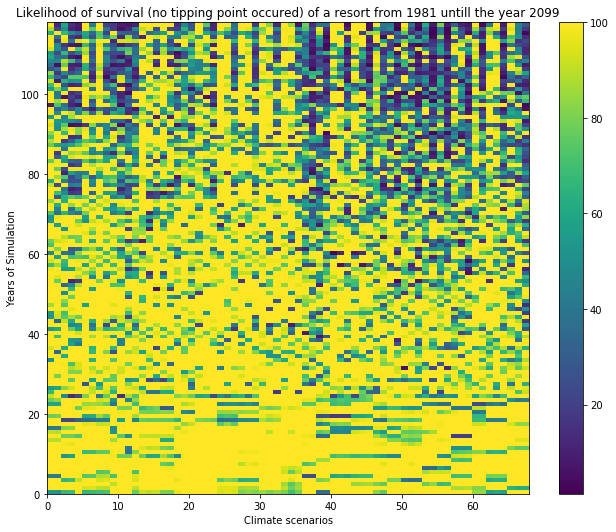

In [24]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df_sum_ch2018_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Split the results to Rcps

In [33]:
#Making filter for databases
filt1 = df_sum_ch2018_M.columns.str.contains('RCP26')
filt2 = df_sum_ch2018_M.columns.str.contains('RCP45')
filt3 = df_sum_ch2018_M.columns.str.contains('RCP85')

In [34]:
df1ch2018RCP26 = df_sum_ch2018_M.loc[:, filt1]
df1ch2018RCP45 = df_sum_ch2018_M.loc[:, filt2]
df1ch2018RCP85 = df_sum_ch2018_M.loc[:, filt3]

In [35]:
df1ch2018RCP26Columns= df1ch2018RCP26.columns
df1ch2018RCP45Columns= df1ch2018RCP45.columns
df1ch2018RCP85Columns= df1ch2018RCP85.columns

In [36]:
df1ch2018RCP26.shape

(118, 12)

In [37]:
df1ch2018RCP45.shape

(118, 25)

In [38]:
df1ch2018RCP85.shape

(118, 31)

In [39]:
df1ch2018RCP26.head(4)

,isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp,isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp,isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp,isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp,isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-HADGEM-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-MPIESM-EUR44-RCP26-pcp,isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp
0,92.131876,100.0,94.251923,80.733091,85.278637,80.209358,99.815253,100.000000,100.000000,100.000000,57.771086,100.000000
1,100.000000,100.0,95.060837,86.494621,100.000000,90.529390,100.000000,100.000000,100.000000,87.202823,100.000000,64.791883
2,100.000000,100.0,100.000000,100.000000,100.000000,85.372888,100.000000,83.483203,100.000000,100.000000,100.000000,100.000000
3,100.000000,100.0,74.916566,62.495819,100.000000,100.000000,100.000000,100.000000,40.029643,100.000000,61.176498,100.000000


In [40]:
df1ch2018RCP26_Matrix = df1ch2018RCP26.to_numpy()
df1ch2018RCP45_Matrix = df1ch2018RCP45.to_numpy()
df1ch2018RCP85_Matrix = df1ch2018RCP85.to_numpy()

### Survival Map CH2018 RCP2.6

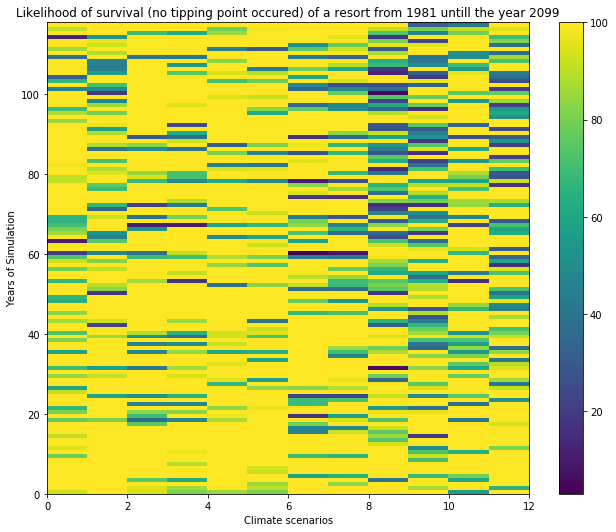

In [41]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1ch2018RCP26_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP4.5

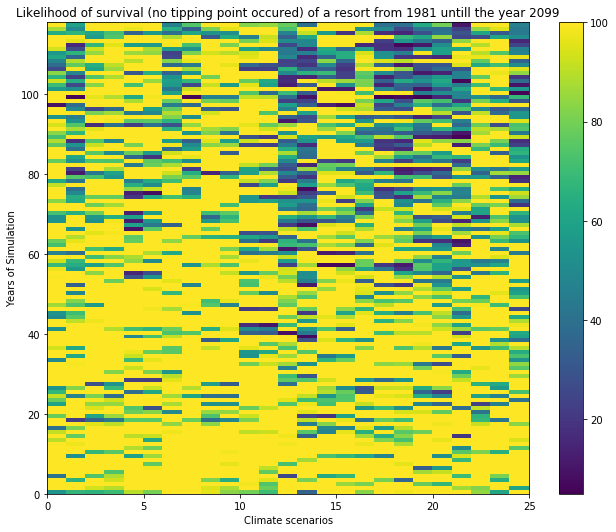

In [42]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1ch2018RCP45_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP8.5

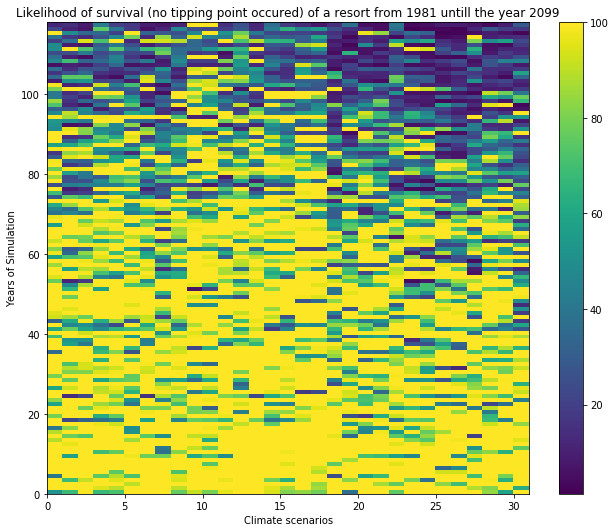

In [43]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1ch2018RCP85_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

## End